In [1]:
import sys
sys.path.append("../lib/")

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors, ticker

from DalitzModel import *
from BWRes import *

%matplotlib inline
plt.rc('animation', html='html5')
plt.rc('text', usetex=True)
plt.rc('font', size=18)

# Auxiliary functions

The plot_ddist function draws a 2D hist for a Dalitz distribution

In [2]:
def plot_ddist(mab, mbc, bins=200, num=None):
    """ Scatter plot of Dalitz distribution """
    fig = plt.figure(num=num, figsize=(8,6))
    ax = fig.add_subplot(111)
    hist = ax.hist2d(mab, mbc, bins=bins, cmap=plt.cm.PuBu)
    fig.colorbar(hist[3], ax=ax, pad=0.02)

The phsp_edge function calculates edges of the kinematically allowed phase space

In [3]:
def phsp_edge(phsp, rtype1, rtype2):
    """ Calculate phase space edges """
    mr1_min, mr1_max = phsp.mass_sq_range[rtype1]
    mr1_space = np.linspace(mr1_min, mr1_max, 1000)
    mr2_mins, mr2_maxs = phsp.mr_sq_range(rtype2, mr1_space, rtype1)
    mr1 = np.concatenate([mr1_space, mr1_space[::-1]])
    mr2 = np.concatenate([mr2_mins, mr2_maxs[::-1]])
    return [mr1, mr2]

The show_phase_space function calls the phsp_edge function and draws kinematically allowed phase space

In [4]:
def show_phase_space(phsp, rtype1, rtype2, num=None, color=None):
    """ Plot phase space edge """
    if color is None:
        color = 'blue'
    mr1, mr2 = phsp_edge(phsp, rtype1, rtype2)
    mr1_range = max(mr1) - min(mr1)
    mr2_range = max(mr2) - min(mr2)
    fig = plt.figure(num=num)
    plt.plot(mr1, mr2, linestyle='-', color=color)
    plt.gca().set_xlabel(r'$m^{2}_{\mathrm{' + rtype1 + r'}}\ (GeV^{2}/c^{4})$')
    plt.gca().set_ylabel(r'$m^{2}_{\mathrm{' + rtype2 + r'}}\ (GeV^{2}/c^{4})$')
    plt.axis('equal')
    plt.tight_layout()
    plt.xlim(0, 1.05*max(mr1))
    plt.ylim(0, 1.05*max(mr2))

In [5]:
def plot_density_countours(msq1g, msq2g, dens, num=None, figsize=None, nlevels=25, cmap=plt.cm.PuBu):
    fig = plt.figure(num=num, figsize=figsize)
    levels = np.linspace(0, max(dens.flatten()), nlevels)
    CS = plt.contourf(msq1g, msq2g, dens, cmap=cmap, levels=levels)
    plt.colorbar(CS)

In [6]:
def projections(mab_sq, mac_sq, mbc_sq):
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 3))
    ax1.hist(np.sqrt(mab_sq), bins=100, normed=True, edgecolor = "none", color=['steelblue']);
    ax2.hist(np.sqrt(mac_sq), bins=100, normed=True, edgecolor = "none", color=['steelblue']);
    ax3.hist(np.sqrt(mbc_sq), bins=100, normed=True,edgecolor = "none", color=['steelblue']);

## Model initialization
Define a $D^0 \to K_S^0 \pi^+ \pi^-$ decay model with two resonances: $\rho(770)$ and $K^*(892)$

In [7]:
model = DalitzModel(.475, .135, .135, 1.865)
model.add_bw('rho(770)', .770, .1490, 1, 'BC')
model.add_bw('K*', .89166, 0.0508, 1, 'AB', 0.638*np.exp(1j*np.radians(133.2)))

## Density contour plot

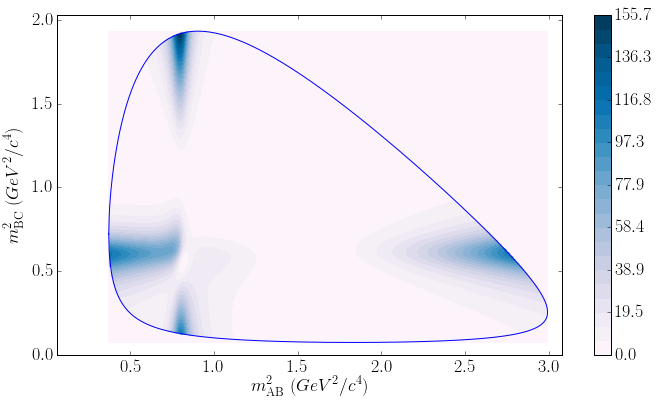

In [8]:
msq1g, msq2g, dens = model.grid_dens('AB', 'BC', 250)
plot_density_countours(msq1g, msq2g, dens, 6, (10, 6))
show_phase_space(model, 'AB', 'BC', 6, 'blue')

## Sampling Dalitz distribution
### Neumann's method

In [9]:
majorant = model.assess_majorant()
majorant

237.67156173886434

$10^6$ events are generated in about 24 seconds with the Neumann's method:

In [10]:
%%time
rtype1, rtype2 = 'AB', 'BC'
smpl = model.sample(10**6, rtype1, rtype2)
mab_sq, mbc_sq = smpl[rtype1], smpl[rtype2]

43258 events generated
86355 events generated
129941 events generated
173476 events generated
217056 events generated
260371 events generated
303766 events generated
347214 events generated
390711 events generated
433948 events generated
477405 events generated
521005 events generated
564349 events generated
607807 events generated
651449 events generated
694760 events generated
738180 events generated
781508 events generated
824918 events generated
868670 events generated
912305 events generated
955528 events generated
998854 events generated
1042343 events generated
CPU times: user 23 s, sys: 2.08 s, total: 25 s
Wall time: 25 s


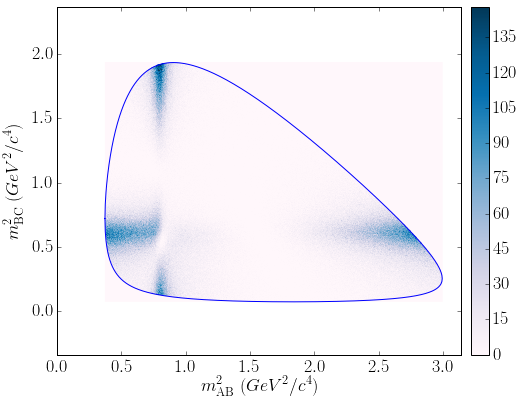

In [11]:
plot_ddist(mab_sq, mbc_sq, 400, 5)
show_phase_space(model, rtype1, rtype2, 5)

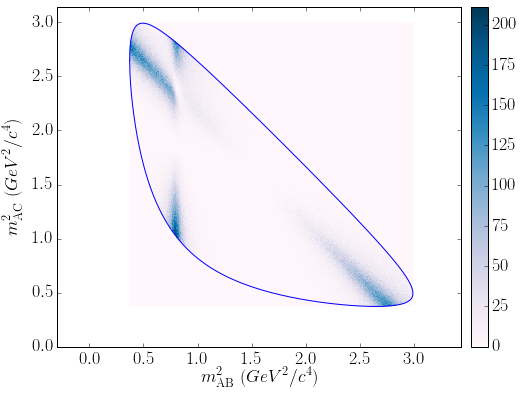

In [12]:
mac_sq = model.third_mass_sq(mab_sq, mbc_sq)
plot_ddist(mab_sq, mac_sq, 400, 5)
show_phase_space(model, 'AB', 'AC', 5)

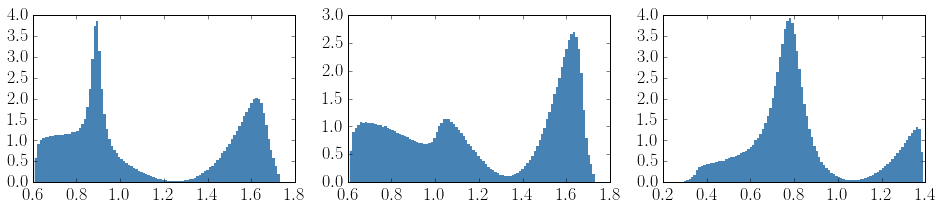

In [13]:
projections(mab_sq, mac_sq, mbc_sq)

### Markov chain MC method
Now we generate $10^6$ events in about 5 seconds

In [14]:
%%time
rtype1, rtype2 = 'AB', 'BC'
mcmc_smpl = model.mcmc_sample(10**7, rtype1, rtype2, 0.1, 32)
mab_sq, mbc_sq = mcmc_smpl[rtype1], mcmc_smpl[rtype2]

s1 = 0.26208, s2 = 0.18592
iteration 1000, nevt 695304 / 10000000
iteration 2000, nevt 1391304 / 10000000
iteration 3000, nevt 2087304 / 10000000
iteration 4000, nevt 2783304 / 10000000
iteration 5000, nevt 3479304 / 10000000
iteration 6000, nevt 4175304 / 10000000
iteration 7000, nevt 4871304 / 10000000
iteration 8000, nevt 5567304 / 10000000
iteration 9000, nevt 6263304 / 10000000
iteration 10000, nevt 6959304 / 10000000
iteration 11000, nevt 7655304 / 10000000
iteration 12000, nevt 8351304 / 10000000
iteration 13000, nevt 9047304 / 10000000
iteration 14000, nevt 9743304 / 10000000
Acceptance rate = 0.55384531078
CPU times: user 44.3 s, sys: 292 ms, total: 44.6 s
Wall time: 44.6 s


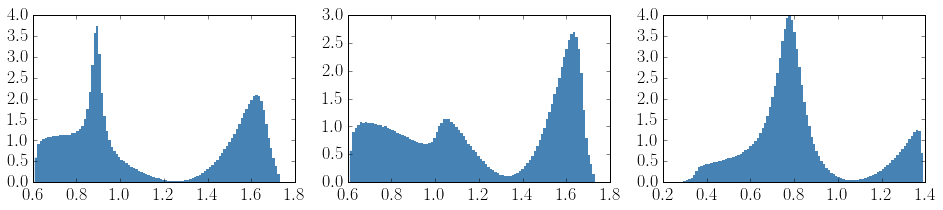

In [15]:
projections(mab_sq, mac_sq, mbc_sq)

## Animated interference

In [16]:
from matplotlib import animation

In [17]:
FIG = plt.figure(num=9, figsize=(9, 6))
AXES = plt.axes()
show_phase_space(model, 'AB', 'BC', 9, 'blue')
plt.grid()
plt.title(r'$\rho(770)$ -- $K^*(892)$ interference')
plt.close()

In [18]:
ims = []
for i in range(200):
    model.rdict['K*']['ampl'] *= np.exp(1j * np.pi / 100)
    dens = model.density(msq1g, msq2g, 'AB', 'BC')
    levels = np.linspace(0, max(dens.flatten()), 25)
    cont = AXES.contourf(msq1g, msq2g, dens, cmap=plt.cm.PuBu, levels=levels)
    add_arts = cont.collections
    text = ''
    te = AXES.text(90,90,str(text))
    an = AXES.annotate(str(text), xy=(0.45, 1.05), xycoords='axes fraction')
    ims.append(add_arts + [te,an])
    if (i+1) % 10 == 0:
        print 'frame {} / {}'.format(i+1, 200)

frame 10 / 200
frame 20 / 200
frame 30 / 200
frame 40 / 200
frame 50 / 200
frame 60 / 200
frame 70 / 200
frame 80 / 200
frame 90 / 200
frame 100 / 200
frame 110 / 200
frame 120 / 200
frame 130 / 200
frame 140 / 200
frame 150 / 200
frame 160 / 200
frame 170 / 200
frame 180 / 200
frame 190 / 200
frame 200 / 200


In [19]:
ani = animation.ArtistAnimation(FIG, ims, interval=20, blit=True)
ani